### Table of Contents:
* [1. Business Understanding](#first-bullet)
* [2. Data Understanding](#second-bullet)
* [3. Prepare Data](#third-bullet)
* [4. Model Data](#model-bullet)
* [5. Results](#results-bullet)
* [6. Deploy](#Deploy-bullet)
* [X. Credits](#credits-bullet)

# NHANES Diabetes Exploration
## by Christopher Phillips

## 1. Business Understanding <a class="anchor" id="first-bullet"></a>

> The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. NHANES is a major program of the National Center for Health Statistics (NCHS). NCHS is part of the Centers for Disease Control and Prevention (CDC) and has the responsibility for producing vital and health statistics for the Nation.

>The NHANES program began in the early 1960s and has been conducted as a series of surveys focusing on different population groups or health topics. In 1999, the survey became a continuous program that has a changing focus on a variety of health and nutrition measurements to meet emerging needs. The survey examines a nationally representative sample of about 5,000 persons each year. These persons are located in counties across the country, 15 of which are visited each year.

>The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of medical, dental, and physiological measurements, as well as laboratory tests administered by highly trained medical personnel.

>Diabetes mellitus is a chronic disease characterized by hyperglycemia.

### Our main questions:

1. What portion of NHANES study patients have pre-diabetes or full diabetes.
2. Are there differences in demographics that might help predict which population is at a greater risk for developing diabetes?
3. How well can we predict an individual's diabetes risk based on their comorbidities?

## 2. Data Understanding <a class="anchor" id="second-bullet"></a>

### Load The Libraries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Load The Data Set

In [2]:
# Load the 2013-2014 NHANES data files
# Demographics data, laboratory data, examination data,
# diet data, general questionnaire data
df1 = pd.read_csv('demographic.csv')
df2 = pd.read_csv('labs.csv')
df3 = pd.read_csv('examination.csv')
df4 = pd.read_csv('diet.csv')
df5 = pd.read_csv('questionnaire.csv')

In [3]:
# data file headings are truncated for ease of use.
# we will translate them after combining the files.

In [30]:
# demographics file head
df1.head(2)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78


In [5]:
# labs data file head
df2.head(2)

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2


In [6]:
# examination data file head
df3.head(2)

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0


In [7]:
# diet survey data file head
df4.head(2)

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [8]:
# general questionaire data file head
df5.head(2)

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN


NHANES files all with SEQN as the anonymized patient ID. Will use this number for the merger.

In [9]:
# Merge NHANES patient files
df_merge_step1 = pd.merge(left=df1,
                                 right=df2, left_on='SEQN', right_on='SEQN', how='inner')
df_merge_step2 = pd.merge(left=df_merge_step1,
                                 right=df3, left_on='SEQN', right_on='SEQN', how='inner')
df_merge_step3 = pd.merge(left=df_merge_step2,
                                 right=df4, left_on='SEQN', right_on='SEQN', how='inner')
df_data = pd.merge(left=df_merge_step3,
                                 right=df5, left_on='SEQN', right_on='SEQN', how='inner')

In [4]:
# data file shape (rows, columns)
df_data.shape

(9813, 1812)

In [ ]:
# Our merged file has 9813 entries with 1812 columns

In [10]:
# merged data set head
df_data.head(3)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN


In [10]:
# Save base file before cleaning
df_data.to_csv('df_data.csv')

In [31]:
# Create copy of root database
df_final = df_data.copy()

In [32]:
# We will create a data set of a limited number of patient parameters
# to focus on for our research

In [33]:
# select basic patient information related to diabetes and general patient stats
df_final = df_final[['SEQN','DMDMARTL','INDHHIN2','RIAGENDR','RIDAGEYR','RIDEXPRG','RIDRETH1',
                    'BMXHT','BMXWT','BPXCHR','BPXDI1','BPXSY1','BMXBMI', 'LBDHDD', 'LBDLDL',
                     'LBXTC','LBXGH','LBXSTR']]

In [34]:
# top rows of data subset
df_final.head()

,SEQN,DMDMARTL,INDHHIN2,RIAGENDR,RIDAGEYR,RIDEXPRG,RIDRETH1,BMXHT,BMXWT,BPXCHR,BPXDI1,BPXSY1,BMXBMI,LBDHDD,LBDLDL,LBXTC,LBXGH,LBXSTR
0,73557,4.0,4.0,1,69,NaN,4,171.3,78.3,NaN,72.0,122.0,26.7,65.0,NaN,167.0,13.9,140.0
1,73558,1.0,7.0,1,54,NaN,3,176.8,89.5,NaN,62.0,156.0,28.6,50.0,NaN,170.0,9.1,257.0
2,73559,1.0,10.0,1,72,NaN,3,175.3,88.9,NaN,90.0,140.0,28.9,60.0,56.0,126.0,8.9,51.0
3,73560,NaN,9.0,1,9,NaN,3,137.3,32.2,NaN,38.0,108.0,17.1,61.0,NaN,168.0,NaN,NaN
4,73561,1.0,15.0,2,73,NaN,3,162.4,52.0,NaN,86.0,136.0,19.7,85.0,101.0,201.0,4.9,88.0


In [35]:
# rename columns to make them easier to read
df_final = df_final.rename(columns = {'SEQN' : 'ID',
                          'DMDMARTL' : 'Marital_Status',
                          'INDHHIN2' : 'Household_Income',
                          'RIAGENDR' : 'Gender',
                          'RIDAGEYR' : 'Age_Years',
                          'RIDEXPRG' : 'Pregnancy_Status',
                          'RIDRETH1' : 'Race',
                          'BMXHT'    : 'Height',                                         
                          'BMXWT'    : 'Weight',            
                          'BPXCHR'   : 'Heart_Rate',
                          'BPXDI1'   : 'Diastolic_BP',
                          'BPXSY1'   : 'Systolic_BP',
                          'BMXBMI'   : 'BMI',
                          'LBDHDD'   : "HDL",       
                          'LBDLDL'   : "LDL",        
                          'LBXTC'   : 'Total_Cholesterol',
                          'LBXGH' : 'GlycoHemoglobin',
                          'LBXSTR' : 'Triglycerides'})

In [36]:
# Data set describe with updated column names
df_final.describe()

,ID,Marital_Status,Household_Income,Gender,Age_Years,Pregnancy_Status,Race,Height,Weight,Heart_Rate,Diastolic_BP,Systolic_BP,BMI,HDL,LDL,Total_Cholesterol,GlycoHemoglobin,Triglycerides
count,9813.000000,5588.000000,9700.000000,9813.000000,9813.000000,1262.000000,9813.000000,9067.000000,9723.000000,1961.000000,7172.000000,7172.000000,9055.000000,7624.000000,3105.000000,7624.000000,6643.000000,6549.000000
mean,78644.559971,2.564424,10.831959,1.507694,31.629573,1.985737,3.083766,155.883759,62.599054,105.534931,65.769939,118.123536,25.678244,53.105194,106.221256,179.534103,5.642556,143.084288
std,2938.592266,2.647199,13.754352,0.499966,24.397553,0.297682,1.262812,23.176270,32.331616,21.516295,14.960108,18.078149,7.955137,15.230838,34.988663,40.954000,1.004850,134.540026
min,73557.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,79.700000,3.100000,60.000000,0.000000,66.000000,12.100000,10.000000,14.000000,69.000000,3.500000,19.000000
25%,76092.000000,1.000000,5.000000,1.000000,10.000000,2.000000,2.000000,149.500000,37.950000,88.000000,58.000000,106.000000,19.700000,42.000000,81.000000,151.000000,5.200000,72.000000
50%,78643.000000,1.000000,8.000000,2.000000,27.000000,2.000000,3.000000,162.000000,65.300000,102.000000,66.000000,116.000000,24.700000,51.000000,103.000000,175.000000,5.400000,111.000000
75%,81191.000000,5.000000,14.000000,2.000000,52.000000,2.000000,4.000000,171.050000,83.500000,120.000000,76.000000,128.000000,30.200000,61.000000,127.000000,204.000000,5.800000,175.000000
max,83731.000000,99.000000,99.000000,2.000000,80.000000,3.000000,5.000000,202.600000,222.600000,178.000000,122.000000,228.000000,82.900000,173.000000,375.000000,813.000000,17.500000,6057.000000


In [ ]:
# Per NHANES DMDMARTL variable Marital Status:
# 1 Married 2 Widowed 3 Divorced 4 Separated 5 Never married
# 6 Never married
# 77 refused 99 Don't know
# Per NHANES RIDRETH1 variable Race:
# 1 Mexican American 2 Other Hispanic 3 Non-Hispanic White
# 4 Non-Hispanic Black 5 Other Race-Including Multi-Racial
# Per NHANES RIDEXPRG Pregnancy Status at Exam
# 1 Yes, lab or self-reported 2 SP not pregnant at exam
# 3 Cannot ascertain if SP is pregnant "." Missing Data
# Per NHANES INDHHIN2 Annual Household Income is a bracketed
# category i.e., 1 $0 to $4,999 through 15 $100,000 and Over
# Per NHANES Height is in centimeters Weight is in Kilograms

In [37]:
# data file high-level info
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 0 to 9812
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 9813 non-null   int64  
 1   Marital_Status     5588 non-null   float64
 2   Household_Income   9700 non-null   float64
 3   Gender             9813 non-null   int64  
 4   Age_Years          9813 non-null   int64  
 5   Pregnancy_Status   1262 non-null   float64
 6   Race               9813 non-null   int64  
 7   Height             9067 non-null   float64
 8   Weight             9723 non-null   float64
 9   Heart_Rate         1961 non-null   float64
 10  Diastolic_BP       7172 non-null   float64
 11  Systolic_BP        7172 non-null   float64
 12  BMI                9055 non-null   float64
 13  HDL                7624 non-null   float64
 14  LDL                3105 non-null   float64
 15  Total_Cholesterol  7624 non-null   float64
 16  GlycoHemoglobin    6643 

In [38]:
# dropping some columns that we won't need for this pass due to way
# data is categorized
df_final = df_final.drop(['Marital_Status', 'Race', 'Household_Income','Pregnancy_Status'], axis=1)

In [39]:
# final basic data set
df_final.describe()

,ID,Gender,Age_Years,Height,Weight,Heart_Rate,Diastolic_BP,Systolic_BP,BMI,HDL,LDL,Total_Cholesterol,GlycoHemoglobin,Triglycerides
count,9813.000000,9813.000000,9813.000000,9067.000000,9723.000000,1961.000000,7172.000000,7172.000000,9055.000000,7624.000000,3105.000000,7624.000000,6643.000000,6549.000000
mean,78644.559971,1.507694,31.629573,155.883759,62.599054,105.534931,65.769939,118.123536,25.678244,53.105194,106.221256,179.534103,5.642556,143.084288
std,2938.592266,0.499966,24.397553,23.176270,32.331616,21.516295,14.960108,18.078149,7.955137,15.230838,34.988663,40.954000,1.004850,134.540026
min,73557.000000,1.000000,0.000000,79.700000,3.100000,60.000000,0.000000,66.000000,12.100000,10.000000,14.000000,69.000000,3.500000,19.000000
25%,76092.000000,1.000000,10.000000,149.500000,37.950000,88.000000,58.000000,106.000000,19.700000,42.000000,81.000000,151.000000,5.200000,72.000000
50%,78643.000000,2.000000,27.000000,162.000000,65.300000,102.000000,66.000000,116.000000,24.700000,51.000000,103.000000,175.000000,5.400000,111.000000
75%,81191.000000,2.000000,52.000000,171.050000,83.500000,120.000000,76.000000,128.000000,30.200000,61.000000,127.000000,204.000000,5.800000,175.000000
max,83731.000000,2.000000,80.000000,202.600000,222.600000,178.000000,122.000000,228.000000,82.900000,173.000000,375.000000,813.000000,17.500000,6057.000000


### To help analysis, creating column that identifies if the patient has:
* A1C equal or greater than 6.4 = Diabetes
* A1C between 5.7 to 6.3 Pre-diabetes
* ALC less than 5.7 = No Diabetes

In [40]:
# Categorize GlycoHemoglbin into no diabetes, pre diabetes, and diabetes.
df_final.loc[df_final['GlycoHemoglobin'] < 5.7, 'Diabetes'] = 0
df_final.loc[(df_final['GlycoHemoglobin'] >= 5.7) & (df_final['GlycoHemoglobin'] < 6.4), 'Diabetes'] = 1
df_final.loc[df_final['GlycoHemoglobin'] >= 6.4, 'Diabetes'] = 2

#display top rows of data set
df_final.head(10)


,ID,Gender,Age_Years,Height,Weight,Heart_Rate,Diastolic_BP,Systolic_BP,BMI,HDL,LDL,Total_Cholesterol,GlycoHemoglobin,Triglycerides,Diabetes
0,73557,1,69,171.3,78.3,NaN,72.0,122.0,26.7,65.0,NaN,167.0,13.9,140.0,2.0
1,73558,1,54,176.8,89.5,NaN,62.0,156.0,28.6,50.0,NaN,170.0,9.1,257.0,2.0
2,73559,1,72,175.3,88.9,NaN,90.0,140.0,28.9,60.0,56.0,126.0,8.9,51.0,2.0
3,73560,1,9,137.3,32.2,NaN,38.0,108.0,17.1,61.0,NaN,168.0,NaN,NaN,NaN
4,73561,2,73,162.4,52.0,NaN,86.0,136.0,19.7,85.0,101.0,201.0,4.9,88.0,0.0
5,73562,1,56,158.7,105.0,NaN,84.0,160.0,41.7,38.0,NaN,226.0,5.5,327.0,0.0
6,73563,1,0,NaN,7.4,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,2,61,161.8,93.4,NaN,80.0,118.0,35.7,58.0,97.0,168.0,5.5,68.0,0.0
8,73566,2,56,152.8,61.8,NaN,74.0,128.0,26.5,59.0,NaN,278.0,5.4,262.0,0.0
9,73567,1,65,172.4,65.3,NaN,78.0,140.0,22.0,79.0,NaN,173.0,5.2,39.0,0.0


In [41]:
# Save final data set
df_final.to_csv('df_final.csv')

### What is the structure of your dataset?

> Files consist of patient longitudinal research data collected since 1999 in two-year cycles. This set from Kaggle is 2013-2014. Data is divided into five sections: 

    * Demographics such as weights, sampling units. 
    * Dietary files collecting foods and beverage information. 
    * Examination information from physicals with physicians. 
    * Laboratory files with results from blood, urine, hair analysis. 
    * Questionnaire data about household information. 
    

### What is/are the main feature(s) of interest in your dataset?

> Main feature of interest would be tracking patient disease related information such as diabetes, hypertension, cardiac issues.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The main focus will be on diabetes related information and what other comorbidities the patients might have like hypertension or cardiac issues.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

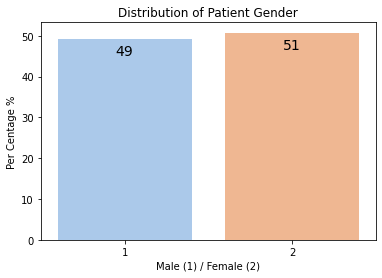

In [42]:
# plot the distribution of members' Gender
sb.set_palette("pastel")
ax = sb.barplot(data=df_final, x='Gender', y='ID', estimator=lambda x: len(x) / len(df_final) * 100);

for p in ax.patches: 
    ax.annotate(format(round(p.get_height()), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', size=14, 
                   xytext=(0, -12), 
                   textcoords='offset points');
    
plt.xlabel('Male (1) / Female (2)')
plt.ylabel('Per Centage %');
plt.title('Distribution of Patient Gender');


#estimator=lambda x: len(x) / len(df_final) * 100

Males and Females of all ages are almost equal in the data set with a slight favor towards females.

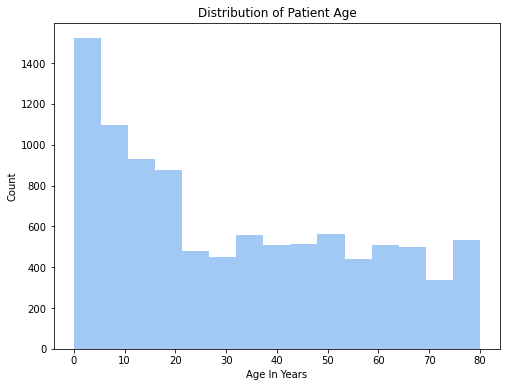

In [43]:
# plot the distribution of members' Age

plt.figure(figsize=[8, 6])
plt.hist(df_final['Age_Years'].dropna(), bins=15)

    
plt.xlabel('Age In Years')
plt.ylabel('Count')
plt.title('Distribution of Patient Age');

There are a fair number of children in the data set.

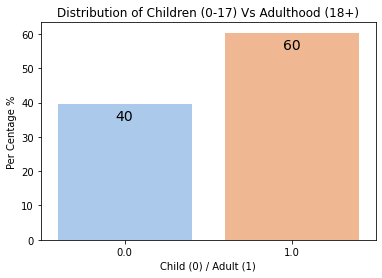

In [44]:
# plot the distribution of members' Adulthood
df_final.loc[df_final['Age_Years'] < 18 , 'Adult'] = 0
df_final.loc[(df_final['Age_Years'] >= 18), 'Adult'] = 1
ax=sb.barplot(data=df_final, x='Adult',y='ID', estimator=lambda x: len(x) / len(df_final) * 100)
for p in ax.patches: 
    ax.annotate(format(round(p.get_height()), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', size=14, 
                   xytext=(0, -12), 
                   textcoords='offset points');



plt.xlabel('Child (0) / Adult (1)')
plt.ylabel('Per Centage %');
plt.title('Distribution of Children (0-17) Vs Adulthood (18+)');

There are a larger number of Adults in the study. We can expect that the major of the children do not have diabetes.

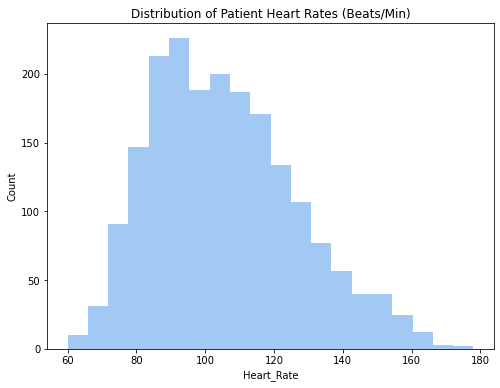

In [45]:
# plot the distribution of members' Heart Rate
plt.figure(figsize=[8, 6])
plt.hist(df_final['Heart_Rate'].dropna(), bins=20)
plt.xlabel('Heart_Rate')
plt.ylabel('Count')
plt.title('Distribution of Patient Heart Rates (Beats/Min)');

In looking at the data set, all Adult Heart_rates are NaN. So, we will drop Heart_Rates from the analysis.

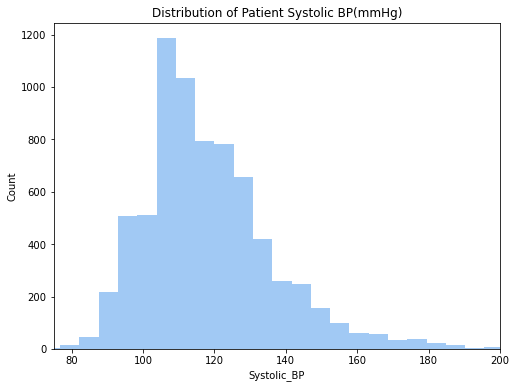

In [46]:
# plot the distribution of members' Systolic Blood Pressure
plt.figure(figsize=[8, 6])
plt.hist(df_final['Systolic_BP'].dropna(), bins=30)
plt.xlabel('Systolic_BP')
plt.ylabel('Count')
plt.xlim(left=75,right=200)
plt.title('Distribution of Patient Systolic BP(mmHg)');

The distribution of Systolic Blood Pressure is right squewed due to the number of children in the data set.

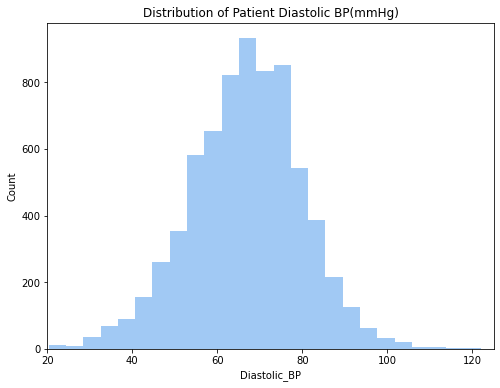

In [47]:
# plot the distribution of members' Diastolic Blood Pressure
plt.figure(figsize=[8, 6])
plt.hist(df_final['Diastolic_BP'].dropna(), bins=30)
plt.xlabel('Diastolic_BP')
plt.ylabel('Count')
plt.xlim(left=20,right=125)
plt.title('Distribution of Patient Diastolic BP(mmHg)');

The distribution of Diastolic Blood Pressure is less right squewed than the Systolic Blood pressure.

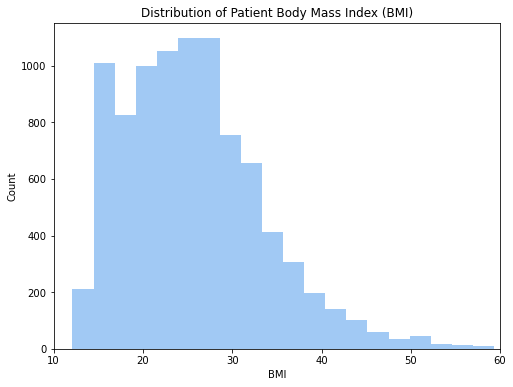

In [48]:
# plot the distribution of members' BMI
plt.figure(figsize=[8, 6])
plt.hist(df_final['BMI'].dropna(), bins=30)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.xlim(left=10,right=60)
plt.title('Distribution of Patient Body Mass Index (BMI)');

The distribution of BMI is right squewed due to the number of children in the data set.

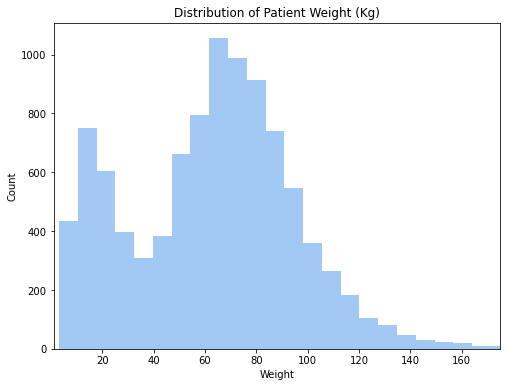

In [49]:
# plot the distribution of members' Weight in Kilograms
plt.figure(figsize=[8, 6])
plt.hist(df_final['Weight'].dropna(), bins=30)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.xlim(left=1,right=175)
plt.title('Distribution of Patient Weight (Kg)');

The patient weight is also somewhat right skewed due to the number of children in the data set.

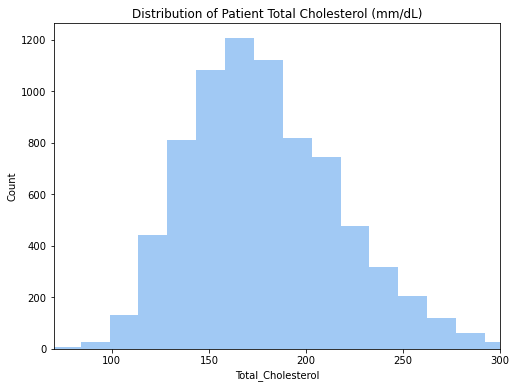

In [50]:
# plot the distribution of members' Total Cholesterol
plt.figure(figsize=[8, 6])
plt.hist(df_final['Total_Cholesterol'].dropna(), bins=50)
plt.xlabel('Total_Cholesterol')
plt.ylabel('Count')
plt.xlim(left=70,right=300)
plt.title('Distribution of Patient Total Cholesterol (mm/dL)');

National guidelines are for Total Cholesterol to be 200 or less. So, there is a substantial number of patients above targets.

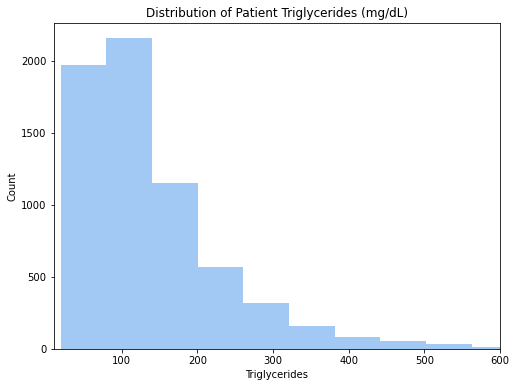

In [51]:
# plot the distribution of members' Triglycerides
df = df_final[df_final['Adult'] >= 0]
plt.figure(figsize=[8, 6])
plt.hist(df['Triglycerides'].dropna(), bins=100)
plt.xlabel('Triglycerides')
plt.ylabel('Count')
plt.xlim(left=10,right=600)
plt.title('Distribution of Patient Triglycerides (mg/dL)');

Guidelines state Triglycerides are Normal at 150mg/dL or less. Borderline high between 100mg/dL and 199mg/dL. High is greater than 200mg/dL. The graph is right skewed due to the number of children in the data set.

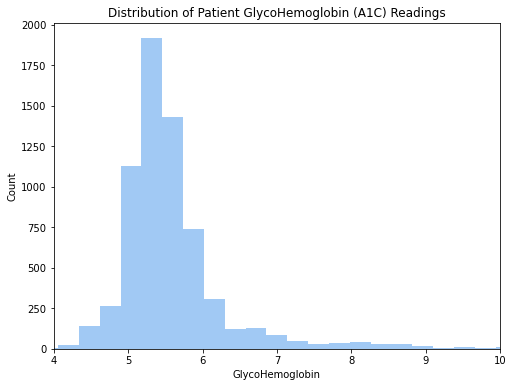

In [52]:
# plot the distribution of members' GlycoHemoglobin (A1C) Readings
df = df_final[df_final['Adult'] >= 0]
plt.figure(figsize=[8, 6])
plt.hist(df['GlycoHemoglobin'].dropna(), bins=50)
plt.xlabel('GlycoHemoglobin')
plt.ylabel('Count')
plt.xlim(left=4,right=10)
plt.title('Distribution of Patient GlycoHemoglobin (A1C) Readings');

The A1C guidelines state  (A1C) 5.6 or less is non-diabetes. There is a long tail of patients with pre-diabetes (A1C) 5.7-6.3 and full diabetes (A1C) 6.4 plus. The chart is also right skewed due to the number of children in the study.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The mean ALC value is 5.6, showing that the average patient in the study is non diabetic. However, the distribution of GlycoHemoglobin has a long tail over 5.6. Diabetes has an association with weight gain, and Cholesterol and Triglycerides have similar distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I did not have to transform the x or y axis on the charts, however, I didn't have to trim the left and right sides of some charts due to outliers.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

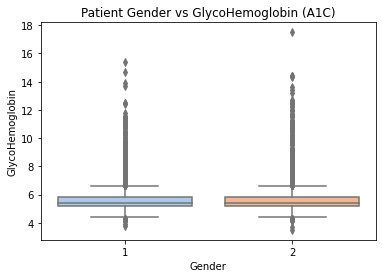

In [53]:
# plot member's Gender vs GlycoHemoglobin (A1C)
sb.boxplot(data=df_final, x='Gender', y='GlycoHemoglobin');
plt.xlabel('Gender');
plt.ylabel('GlycoHemoglobin')
plt.title('Patient Gender vs GlycoHemoglobin (A1C)');

A1C appears to be distributed evenly between Genders

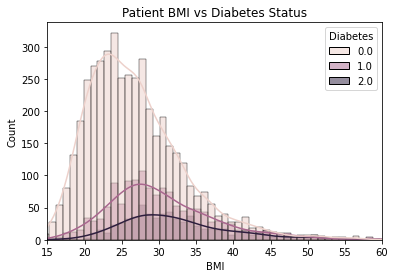

In [54]:
# plot member's BMI vs Diabetes
sb.histplot(data=df_final, x = 'BMI', hue = 'Diabetes', kde=True)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.xlim(left=15,right=60)
plt.title('Patient BMI vs Diabetes Status');

BMI appears to show a positive correlation with Diabetes

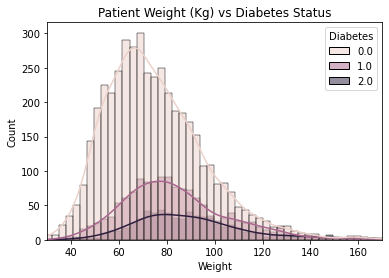

In [55]:
# plot member's Weight vs Diabetes
sb.histplot(data=df_final, x = 'Weight', hue = 'Diabetes', kde=True)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.xlim(left=30,right=170)
plt.title('Patient Weight (Kg) vs Diabetes Status');

Weight appears to show a positive correlation with Diabetes

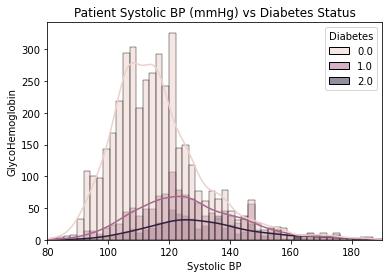

In [56]:
# plot member's Systolic BP vs Diabetes
sb.histplot(data=df_final, x='Systolic_BP', hue='Diabetes', kde=True)
plt.xlabel('Systolic BP')
plt.ylabel('GlycoHemoglobin')
plt.xlim(left=80,right=190)
plt.title('Patient Systolic BP (mmHg) vs Diabetes Status');

Systolic Blood Pressure appears to show a positive correlation with Diabetes

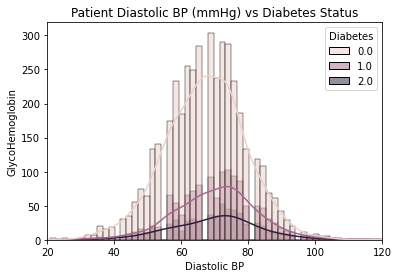

In [57]:
# plot member's Diastolic BP vs Diabetes
sb.histplot(data=df_final, x='Diastolic_BP', hue='Diabetes', kde=True)
plt.xlabel('Diastolic BP')
plt.ylabel('GlycoHemoglobin')
plt.xlim(left=20,right=120)
plt.title('Patient Diastolic BP (mmHg) vs Diabetes Status');

Diastolic Blood Pressure appears to show less of a correlation with Diabetes than Systolic Blood Pressure

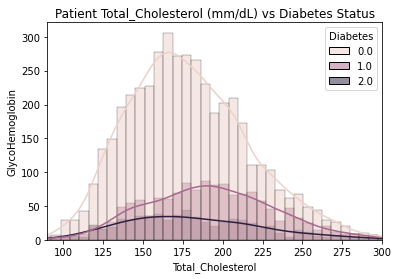

In [58]:
# plot member's Total_Cholesterol vs Diabetes
sb.histplot(data=df_final, x='Total_Cholesterol', hue='Diabetes', kde=True)
plt.xlabel('Total_Cholesterol')
plt.ylabel('GlycoHemoglobin')
plt.xlim(left=90,right=300)
plt.title('Patient Total_Cholesterol (mm/dL) vs Diabetes Status');

Total Cholesterol doesn't appear to show a positive correlation with Diabetes

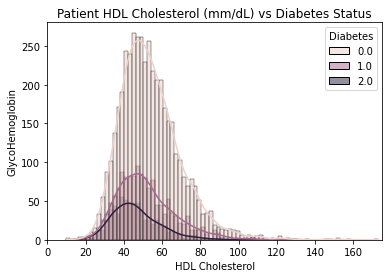

In [59]:
# plot member's Total_Cholesterol vs Diabetes
sb.histplot(data=df_final, x='HDL', hue='Diabetes', kde=True)
plt.xlabel('HDL Cholesterol')
plt.ylabel('GlycoHemoglobin')
plt.xlim(left=0,right=175)
plt.title('Patient HDL Cholesterol (mm/dL) vs Diabetes Status');

There appears to be a negative correlation with High Density Lipoprotein (HDL) and Diabetes.

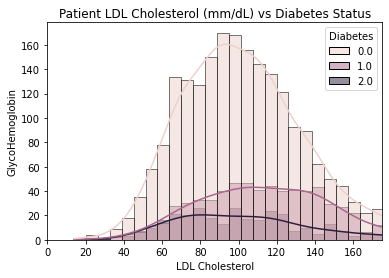

In [60]:
# plot member's Total_Cholesterol vs Diabetes
sb.histplot(data=df_final, x='LDL', hue='Diabetes', kde=True)
plt.xlabel('LDL Cholesterol')
plt.ylabel('GlycoHemoglobin')
plt.xlim(left=0,right=175)
plt.title('Patient LDL Cholesterol (mm/dL) vs Diabetes Status');

There appears to be a positive correlation between elevated Low Density Lipoproteins (LDL) and Diabetes.

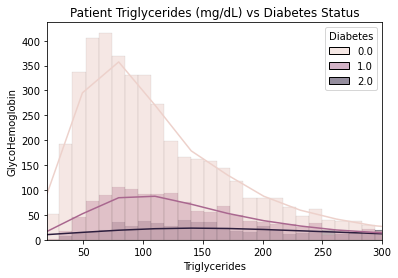

In [61]:
# plot member's Triglycerides vs Diabetes
sb.histplot(data=df_final, x='Triglycerides', hue='Diabetes', kde=True)
plt.xlabel('Triglycerides')
plt.ylabel('GlycoHemoglobin')
plt.xlim(left=20,right=300)
plt.title('Patient Triglycerides (mg/dL) vs Diabetes Status');

Triglycerides appears to show a positive correlation with Diabetes

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> At first blush, there appears to be a relationship between Age, Weight/BMI, and Diabetes. Cholesterol and Triglycerides as well. It is not clear if they are all related simultaneously not only a coocidence between weight gain and cholesterol and triglycerides. When returning to separate HDL and LDL cholesterol, there appears to be a negative association with HDL and diabetes and a positive association with LDL and diabetes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The dataset has a large amount of children and young adults, which presents with low numbers of diabetes on average. The numbers of diabetic patients appears to grow with age and weight gain.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

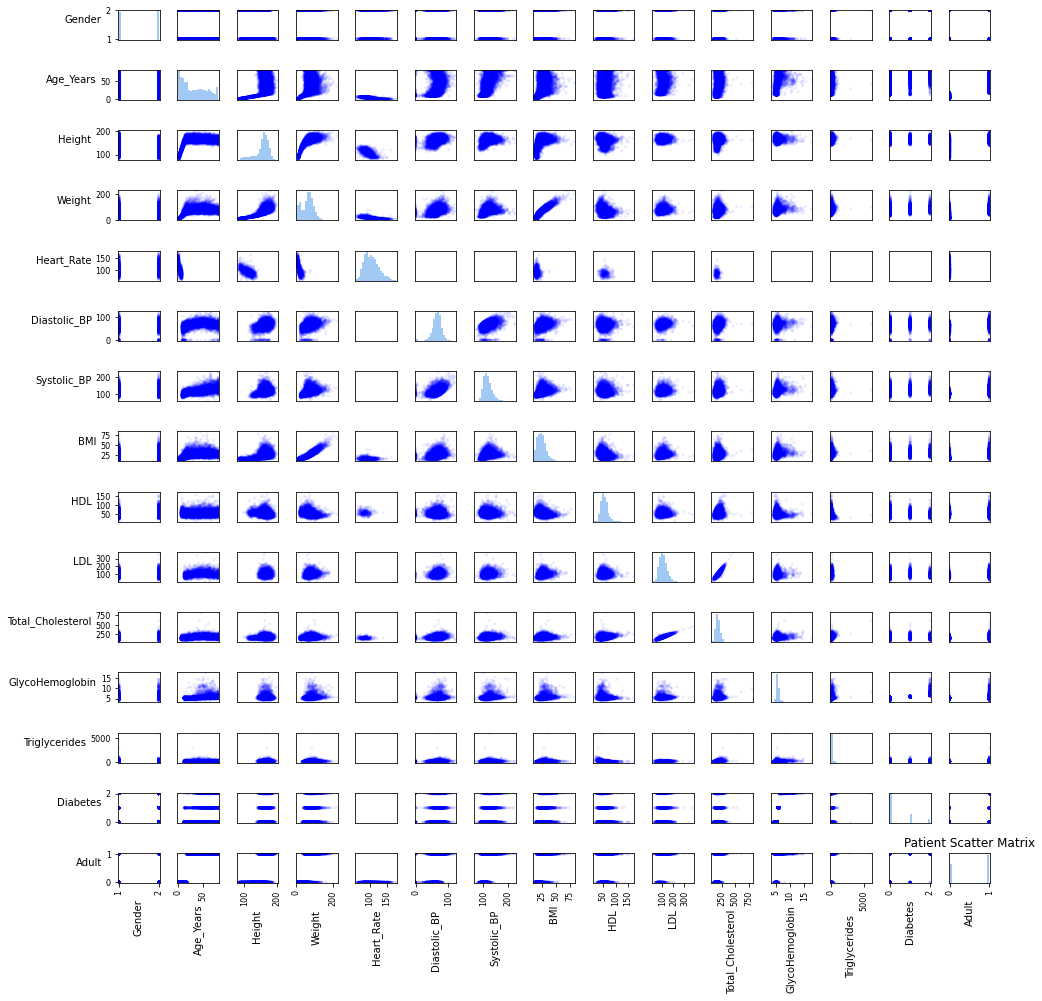

In [62]:
# plot pairwise of data set parameters
df_matrix = df_final.drop(columns=['ID'], axis=1)
axes = pd.plotting.scatter_matrix(df_matrix, c='blue', figsize=(14, 14),
                                 hist_kwds={'bins': 20}, alpha=.08)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    
plt.title('Patient Scatter Matrix');
plt.tight_layout()
plt.show()

There are positive and negative correlations in the paramters that would be worth exploring. As mentioned above, Age, Weight, Systolic Blood Pressure and Triglycerides appear to have a correlation with Diabetes.

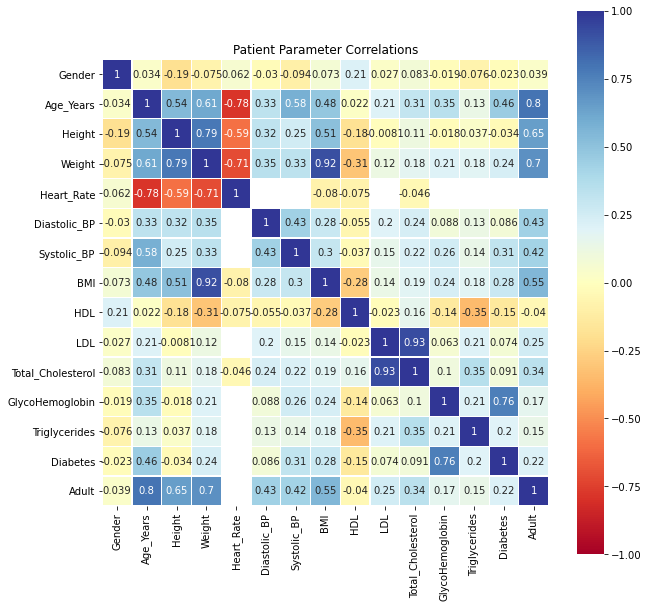

In [63]:
# plot colormap of data set parameters and their correlations
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sb.heatmap(df_final.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1, vmax=1.0,
           vmin = -1.0, square=True, cmap="RdYlBu", annot=True)
plt.title('Patient Parameter Correlations');

There are positive and negative correlations in the paramters that would be worth exploring. As mentioned above, Age, Weight, Systolic Blood Pressure and Triglycerides appear to have a correlation with Diabetes. HDL has a negativ correlation with Diabetes, whild LDL has a positive correlation.

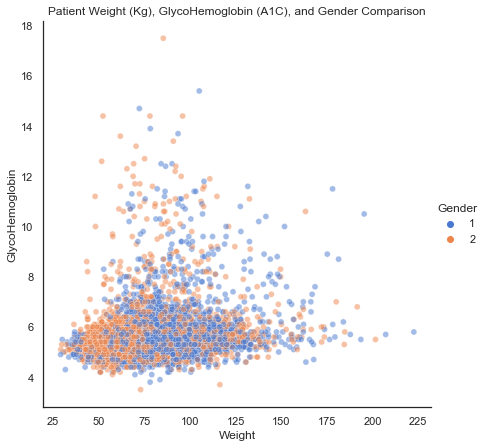

In [64]:
# plot comparison of Weight (Kg), GlycoHemoglobin, and Gender
sb.set_theme(style="white")


sb.relplot(x="Weight", y="GlycoHemoglobin", hue="Gender",
            alpha=.5, palette="muted",
            height=6, data=df_final)
plt.title('Patient Weight (Kg), GlycoHemoglobin (A1C), and Gender Comparison');

A1C and Gender appear to be evenly distributed with a positive correlation with Weight.

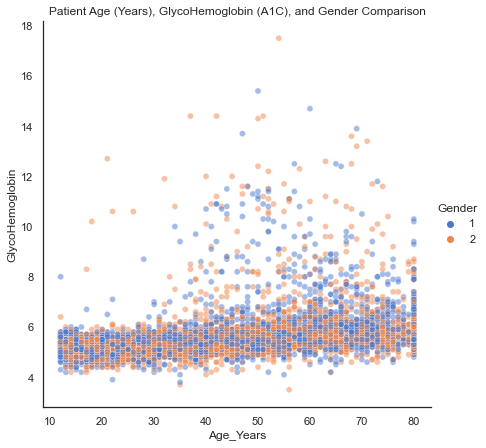

In [65]:
# plot comparison of Age, GlycoHemoglobin, and Gender
sb.set_theme(style="white")


sb.relplot(x="Age_Years", y="GlycoHemoglobin", hue="Gender",
            alpha=.5, palette="muted",
            height=6, data=df_final)
plt.title('Patient Age (Years), GlycoHemoglobin (A1C), and Gender Comparison');

A1C and Gender appear to be evenly distributed with a positive correlation with Age.

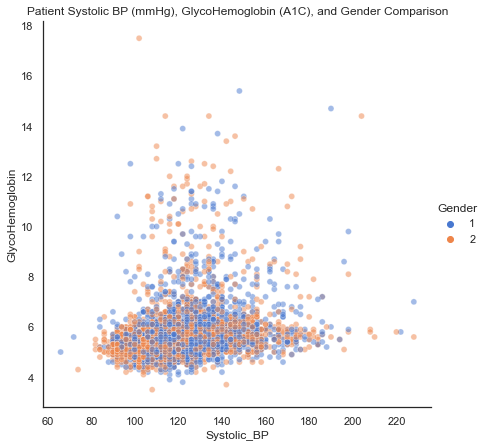

In [66]:
# plot comparison of Systolic_BP, GlycoHemoglobin, and Gender
sb.set_theme(style="white")


sb.relplot(x="Systolic_BP", y="GlycoHemoglobin", hue="Gender",
            alpha=.5, palette="muted",
            height=6, data=df_final)
plt.title('Patient Systolic BP (mmHg), GlycoHemoglobin (A1C), and Gender Comparison');

Diastolic Blood Pressure and Gender appear to be evenly distributed with a positive correlation with Weight.

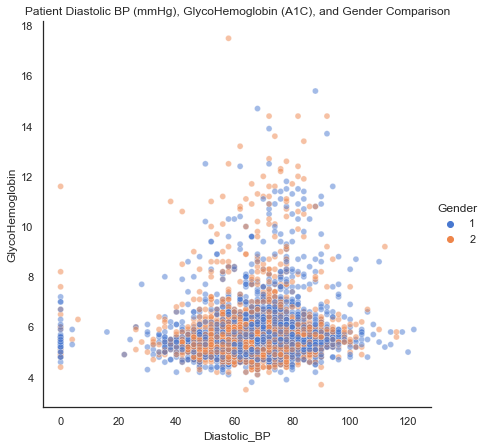

In [67]:
# plot comparison of Diastolic_BP, GlycoHemoglobin, and Gender
sb.set_theme(style="white")


sb.relplot(x="Diastolic_BP", y="GlycoHemoglobin", hue="Gender",
            alpha=.5, palette="muted",
            height=6, data=df_final)
plt.title('Patient Diastolic BP (mmHg), GlycoHemoglobin (A1C), and Gender Comparison');

Diastolic Blood Pressure and Gender appear to be evenly distributed with a positive correlation with Weight.

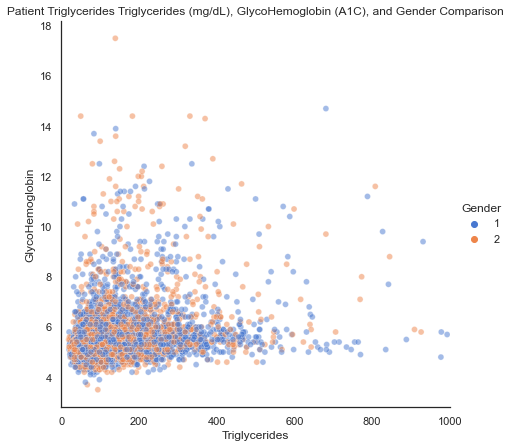

In [68]:
# plot comparison of Triglycerides, GlycoHemoglobin, and Gender
sb.set_theme(style="white")


sb.relplot(x="Triglycerides", y="GlycoHemoglobin", hue="Gender",
            alpha=.5, palette="muted",
            height=6, data=df_final)
plt.xlim(left=0,right=1000)
plt.title('Patient Triglycerides Triglycerides (mg/dL), GlycoHemoglobin (A1C), and Gender Comparison');

Diastolic Blood Pressure and Gender appear to be evenly distributed with a positive correlation with Weight. 

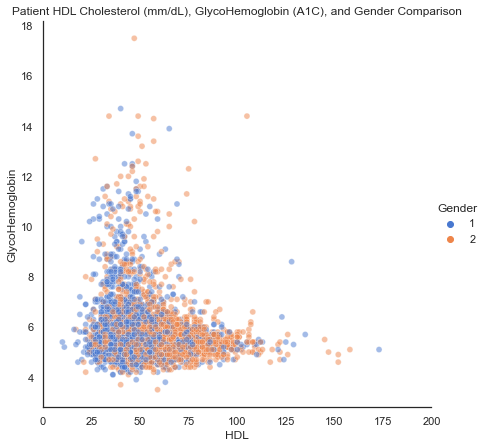

In [69]:
# plot comparison of HDL, GlycoHemoglobin, and Gender
sb.set_theme(style="white")

sb.relplot(x="HDL", y="GlycoHemoglobin", hue="Gender",
            alpha=.5, palette="muted",
            height=6, data=df_final)
plt.xlim(left=0,right=200)
plt.title('Patient HDL Cholesterol (mm/dL), GlycoHemoglobin (A1C), and Gender Comparison');

Relative to LDL, HDL cholesterol shows that HDL increases, A1C numbers tend to run lower.

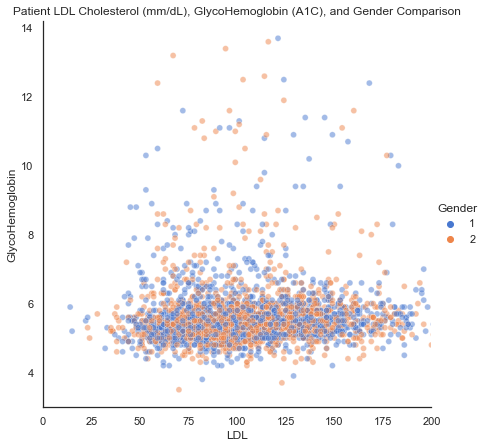

In [70]:
# plot comparison of LDL, GlycoHemoglobin, and Gender
sb.set_theme(style="white")

sb.relplot(x="LDL", y="GlycoHemoglobin", hue="Gender",
            alpha=.5, palette="muted",
            height=6, data=df_final)
plt.xlim(left=0,right=200)
plt.title('Patient LDL Cholesterol (mm/dL), GlycoHemoglobin (A1C), and Gender Comparison');

Relative to HDL, an increase in LDL appears to show that A1C numbers are increasing.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is a positive correlation between Age, Weight/BMI, Triglycerides, and Diabetes. Less so between Total Cholesterol and Diabetes. However, after returning to break out HDL and LDL cholesterol, there is a negative association between HDL and Diabetes and a positive association between LDL cholesterol and Diabetes.  

> Along with that, there is an association with Age and Weight, Blood Peassure, Total Cholesterol, and Triglycerides. 

### Were there any interesting or surprising interactions between features?

> I was surprised about the small correlation between Cholesterol and Diabetes, give the association with Diabetes and diet/Weight. However, after returning to break out HDL and LDL cholesterols, it now makes more sense because HDL is considered to be benefitial, while LDL has a negative impact on cardiovascular health for the patient.

## Prepare Data <a class="anchor" id="third-bullet"></a>

In [71]:
# Save final data set with created adult and diabetes columns
df_final.to_csv('df_final.csv')

In [170]:
# Load final file if working between sessions
df_final = pd.read_csv('df_final.csv', index_col=0)

In [132]:
# look at data columns
df_final.head()

,ID,Gender,Age_Years,Height,Weight,Heart_Rate,Diastolic_BP,Systolic_BP,BMI,HDL,LDL,Total_Cholesterol,GlycoHemoglobin,Triglycerides,Diabetes,Adult
0,73557,1,69,171.3,78.3,NaN,72.0,122.0,26.7,65.0,NaN,167.0,13.9,140.0,2.0,1.0
1,73558,1,54,176.8,89.5,NaN,62.0,156.0,28.6,50.0,NaN,170.0,9.1,257.0,2.0,1.0
2,73559,1,72,175.3,88.9,NaN,90.0,140.0,28.9,60.0,56.0,126.0,8.9,51.0,2.0,1.0
3,73560,1,9,137.3,32.2,NaN,38.0,108.0,17.1,61.0,NaN,168.0,NaN,NaN,NaN,0.0
4,73561,2,73,162.4,52.0,NaN,86.0,136.0,19.7,85.0,101.0,201.0,4.9,88.0,0.0,1.0


In [171]:
# check which columns have the most NaN missing values
df_final.isna().sum()

ID                      0
Gender                  0
Age_Years               0
Height                746
Weight                 90
Heart_Rate           7852
Diastolic_BP         2641
Systolic_BP          2641
BMI                   758
HDL                  2189
LDL                  6708
Total_Cholesterol    2189
GlycoHemoglobin      3170
Triglycerides        3264
Diabetes             3170
Adult                   0
dtype: int64

In [172]:
df_final[df_final['Age_Years']>=18].isna().sum()

ID                      0
Gender                  0
Age_Years               0
Height                 67
Weight                 64
Heart_Rate           5924
Diastolic_BP          498
Systolic_BP           498
BMI                    77
HDL                   284
LDL                  3260
Total_Cholesterol     284
GlycoHemoglobin       234
Triglycerides         304
Diabetes              234
Adult                   0
dtype: int64

In [173]:
# We are missing much for the needed data under 18 years of age. Will focus on 18 plus for our modeling.

In [174]:
# Select only patients 18 and older
df_final = df_final[df_final['Age_Years']>=18]

In [175]:
# We now have 5924 patient records of 18 plus years of age.
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5924 entries, 0 to 9810
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5924 non-null   int64  
 1   Gender             5924 non-null   int64  
 2   Age_Years          5924 non-null   int64  
 3   Height             5857 non-null   float64
 4   Weight             5860 non-null   float64
 5   Heart_Rate         0 non-null      float64
 6   Diastolic_BP       5426 non-null   float64
 7   Systolic_BP        5426 non-null   float64
 8   BMI                5847 non-null   float64
 9   HDL                5640 non-null   float64
 10  LDL                2664 non-null   float64
 11  Total_Cholesterol  5640 non-null   float64
 12  GlycoHemoglobin    5690 non-null   float64
 13  Triglycerides      5620 non-null   float64
 14  Diabetes           5690 non-null   float64
 15  Adult              5924 non-null   float64
dtypes: float64(13), int64(3)

In [176]:
# check which columns have the most NaN missing values
df_final.isna().sum()

ID                      0
Gender                  0
Age_Years               0
Height                 67
Weight                 64
Heart_Rate           5924
Diastolic_BP          498
Systolic_BP           498
BMI                    77
HDL                   284
LDL                  3260
Total_Cholesterol     284
GlycoHemoglobin       234
Triglycerides         304
Diabetes              234
Adult                   0
dtype: int64

In [177]:
# Mean adult height by gender
mean_height_males  = (df_final[(df_final['Gender']==1)])['Height'].mean()
mean_height_females  = (df_final[(df_final['Gender']==2)])['Height'].mean()
print(mean_height_males,mean_height_females)

174.329094812165 160.4727465708688


In [178]:
# We will use average height by gender to replace missing height data.

df_final['Height'] = df_final.apply(
    lambda row: mean_height_males if row['Gender'] == 1 and pd.isnull(row['Height']) \
    else mean_height_females if row['Gender'] == 2 and pd.isnull(row['Height'])
    else row['Height'],    axis=1
)

In [179]:
# check which columns have the most NaN missing values
df_final.isna().sum()

ID                      0
Gender                  0
Age_Years               0
Height                  0
Weight                 64
Heart_Rate           5924
Diastolic_BP          498
Systolic_BP           498
BMI                    77
HDL                   284
LDL                  3260
Total_Cholesterol     284
GlycoHemoglobin       234
Triglycerides         304
Diabetes              234
Adult                   0
dtype: int64

In [180]:
# We will also do the same for weight.
mean_weight_males  = (df_final[(df_final['Gender']==1)])['Weight'].mean()
mean_weight_females  = (df_final[(df_final['Gender']==2)])['Weight'].mean()
print(mean_weight_males,mean_weight_females)

86.44596140100091 75.98579359895496


In [181]:
# We will use average weight by gender to replace missing height data.

df_final['Weight'] = df_final.apply(
    lambda row: mean_weight_males if row['Gender'] == 1 and pd.isnull(row['Weight']) \
    else mean_weight_females if row['Gender'] == 2 and pd.isnull(row['Weight'])
    else row['Weight'],    axis=1
)

In [182]:
# check which columns have the most NaN missing values
df_final.isna().sum()

ID                      0
Gender                  0
Age_Years               0
Height                  0
Weight                  0
Heart_Rate           5924
Diastolic_BP          498
Systolic_BP           498
BMI                    77
HDL                   284
LDL                  3260
Total_Cholesterol     284
GlycoHemoglobin       234
Triglycerides         304
Diabetes              234
Adult                   0
dtype: int64

In [183]:
# There is almost no Heart_Rate,  data so we'll drop it.
df_final = df_final.drop('Heart_Rate', 1)

In [184]:
# check which columns have the most NaN missing values
df_final.isna().sum()

ID                      0
Gender                  0
Age_Years               0
Height                  0
Weight                  0
Diastolic_BP          498
Systolic_BP           498
BMI                    77
HDL                   284
LDL                  3260
Total_Cholesterol     284
GlycoHemoglobin       234
Triglycerides         304
Diabetes              234
Adult                   0
dtype: int64

In [185]:
# We are missing many LDL data points. But we can calculate it based on
# LDL = Total_Cholesterol - HDL - (Triglycerides/5)
df_final['LDL'] = df_final.apply(
    lambda row:  row['Total_Cholesterol']-row['HDL']-(row['Triglycerides']/5) if pd.isnull(row['LDL']) else row['LDL'],    axis=1
)

In [186]:
# check which columns have the most NaN missing values
df_final.isna().sum()

ID                     0
Gender                 0
Age_Years              0
Height                 0
Weight                 0
Diastolic_BP         498
Systolic_BP          498
BMI                   77
HDL                  284
LDL                  290
Total_Cholesterol    284
GlycoHemoglobin      234
Triglycerides        304
Diabetes             234
Adult                  0
dtype: int64

In [187]:
# For the remaining missing data points, we can use averages

In [137]:
def custom_mean(age):
    mean  = (df_final[(df_final['Age_Years']==int(age))])['Height'].mean()
    return mean

In [156]:
df_final

,ID,Gender,Age_Years,Height,Weight,Heart_Rate,Diastolic_BP,Systolic_BP,BMI,HDL,LDL,Total_Cholesterol,GlycoHemoglobin,Triglycerides,Diabetes,Adult
0,73557,1,69,171.3,78.3,NaN,72.0,122.0,26.7,65.0,NaN,167.0,13.9,140.0,2.0,1.0
1,73558,1,54,176.8,89.5,NaN,62.0,156.0,28.6,50.0,NaN,170.0,9.1,257.0,2.0,1.0
2,73559,1,72,175.3,88.9,NaN,90.0,140.0,28.9,60.0,56.0,126.0,8.9,51.0,2.0,1.0
4,73561,2,73,162.4,52.0,NaN,86.0,136.0,19.7,85.0,101.0,201.0,4.9,88.0,0.0,1.0
5,73562,1,56,158.7,105.0,NaN,84.0,160.0,41.7,38.0,NaN,226.0,5.5,327.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804,83723,1,61,173.5,99.5,NaN,NaN,NaN,33.1,49.0,116.0,186.0,7.4,106.0,2.0,1.0
9805,83724,1,80,176.0,77.1,NaN,70.0,164.0,24.9,51.0,NaN,157.0,5.5,135.0,0.0,1.0
9807,83726,1,40,171.7,79.0,NaN,NaN,NaN,26.8,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9808,83727,1,26,171.3,71.8,NaN,68.0,110.0,24.5,55.0,119.0,190.0,5.0,76.0,0.0,1.0


In [140]:
age = '25'
category = 'Height'
print(custom_mean(age))

169.70531914893613


In [128]:
df_final['Height'] = df_final.apply(
    lambda row: custom_mean(row['Age_Years']) if pd.isnull(row['Height']) else row['Height'],    axis=1
)


0.0 nan
1.0 nan
0.0 nan
1.0 nan
1.0 nan
0.0 nan
0.0 nan
3.0 99.02524752475247
0.0 nan
0.0 nan
0.0 nan
2.0 90.99634146341462
0.0 nan
0.0 nan
1.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
3.0 99.02524752475247
0.0 nan
80.0 162.6107255520507
0.0 nan
1.0 nan
4.0 107.19669811320752
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
1.0 nan
0.0 nan
0.0 nan
4.0 107.19669811320752
1.0 nan
56.0 166.37415730337077
74.0 163.17931034482754
0.0 nan
0.0 nan
0.0 nan
1.0 nan
0.0 nan
1.0 nan
0.0 nan
1.0 nan
1.0 nan
0.0 nan
0.0 nan
44.0 168.0958558558559
0.0 nan
1.0 nan
1.0 nan
65.0 165.37999999999994
0.0 nan
1.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
1.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
1.0 nan
1.0 nan
1.0 nan
5.0 113.31167512690347
1.0 nan
0.0 nan
1.0 nan
0.0 nan
0.0 nan
1.0 nan
0.0 nan
60.0 165.4323636363636
2.0 90.99634146341462
0.0 nan
1.0 nan
0.0 nan
1.0 nan
1.0 nan
1.0 nan
19.0 166.8113475177305
1.0 nan
0.0 nan
0.0 nan
0.0 nan
0.0 nan
1.0 nan
0.0 nan
0.0 nan
18.0 168.13978494623655
0.0 nan

In [117]:
df_final['Height'].mean()

155.7738419143048

In [121]:
sum(pd.isnull(df_final['Height']))

638

In [118]:
# check which columns have the most NaN missing values
df_final.isna().sum()

ID                      0
Gender                  0
Age_Years               0
Height                638
Weight                 90
Heart_Rate           7852
Diastolic_BP         2641
Systolic_BP          2641
BMI                   758
HDL                  2189
LDL                  6708
Total_Cholesterol    2189
GlycoHemoglobin      3170
Triglycerides        3264
Diabetes             3170
Adult                   0
dtype: int64

## Model Data  <a class="anchor" id="model-bullet"></a>

In [15]:
# import scikit-learn functions
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [21]:
# setup data for model
feature_names = ['Gender','Age_Years','Weight','Heart_Rate','Diastolic_BP','Systolic_BP','BMI','HDL','LDL','Total_Cholesterol','GlycoHemoglobin','Triglycerides','Adult']
predicted = ['Diabetes']

X= df_final[feature_names]
y= df_final[predicted]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [22]:
# Initiate logistic regression model
lr_model=LogisticRegression(C=0.7,random_state=42)
# Fit model to training data
lr_model.fit(X_train,y_train)
# predict model using test data
lr_pred = lr_model.predict(X_test)

# training metrics
print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,lr_predict)))
print()
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,lr_predict))
print()
print("Classification Report")
print(metrics.classification_report(y_test,lr_predict))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Results  <a class="anchor" id="results-bullet"></a>

## Deploy  <a class="anchor" id="Deploy-bullet"></a>

## Credits:  <a class="anchor" id="credits-bullet"></a>
> "Type 2." diabetes.org. American Diabetes Association. n.d. Web. (date accessed: 2/18/2021).
2018 AHA/ACC/AACVPR/AAPA/ABC/ACPM/ADA/AGS/APhA/ASPC/NLA/PCNA Guideline on the Management of Blood 

> Cholesterol: A Report of the American College of Cardiology/American Heart Association Task Force on Clinical Practice Guidelines  J Am Coll Cardiol. 2019 Jun, 73 (24) e285–e350 

> Hypertriglyceridemia Management According to the 2018 AHA/ACC Guideline (see above) 

> National Health and Nutrition Examination Survey NHANES datasets from 2013-2014 Centers for Disease Control and Prevention  •  updated 4 years ago (Version 1) from Kaggle.com 

> Triglycerides and Diabetes https://www.webmd.com/diabetes/high-triglycerides